A PowerPoint presentation outlining your statistical question/hypothesis
    
    X A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book).
    
    - Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1).
    
    - Describe what the 5 variables mean in the dataset (Chapter 1).
    
    X Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2).
    
    X Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).
    
    X Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

    X Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

    - Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).

    - Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).

    - Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

    - For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).

Your code or screenshots of your code
    
    - A 250-500-word paper summarizing the following: Statistical/Hypothetical Question
    
    - Outcome of your EDA
    
    - What do you feel was missed during the analysis?
    
    - Were there any variables you felt could have helped in the analysis?
    
    - Were there any assumptions made you felt were incorrect?
    
    - What challenges did you face, what did you not fully understand?
    
    - Submit a link to your repository to the assignment link during the final week of class.

In [5]:
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import warnings
import math
warnings.filterwarnings('ignore')

def Summarize(df, column, title):
    """Print summary statistics male, female and all."""

    items = [
        ('All Yrs', df[column]),
        ('2021', df[(df.Wave == 1) | (df.Wave == 2)][column]),
        ('2022', df[(df.Wave == 3) | (df.Wave == 4)][column]),
        ('2023', df[(df.Wave == 5) | (df.Wave == 6)][column]),
        ('2024', df[(df.Wave == 7) | (df.Wave == 8)][column]),
        ]

    print(title)
    print('key\tn\tmean\tmode\tvar\tstd\tcv')
    for key, series in items:
        mean, var, mode = series.mean(), series.var(), series.mode()
        std = math.sqrt(var)
        cv = std / mean
        t = key, len(series), mean, mode, var, std, cv
        print('%s\t%d\t%4.2f\t%4.2f\t%4.2f\t%4.2f\t%4.4f' % t)

# Collect and Format Data

datain = []
datain.append(pd.read_csv("TermProjectData.s24mri.csv"))
datain.append(pd.read_csv("TermProjectData.s23mri.csv"))
datain.append(pd.read_csv("TermProjectData.s22mri.csv"))
datain.append(pd.read_csv("TermProjectData.s21mri.csv"))
data = pd.concat(datain)
data.columns = ["RespID","Pop","HH","Health","HHI","Love","Faith","Happy","Politics"]
data["Wave"] = [int(x)-81 for x in data["RespID"].str[:2]]
data["Pop"] = data["Pop"]*10
data["Wealth"] = 0
octile = np.quantile(data["HHI"],[x/8 for x in range(1,8)])
data.Wealth[data["HHI"] < octile[0]] = 1
for x in range(0,6):
    data.Wealth[(data["HHI"] >= octile[x]) & (data["HHI"] < octile[x+1])] = x+2
data.Wealth[data["HHI"] >= octile[6]] = 8
data.Faith[data["Faith"] == 2.5] = 2
data.Faith[data["Faith"] == 4] = 4
data = data.drop(columns = ["HH","RespID"])
print(data.head(10))


    Pop  Health  HHI  Love  Faith  Happy  Politics  Wave  Wealth
0  5010       3   87     3      4      3         3     8       5
1  9670       2   67     3      4      4         1     8       4
2  2340       4   87     2      1      3         1     8       5
3  5260       4   44     3      4      3         4     8       3
4  5240       4  224     3      4      2         3     8       8
5  3980       2   67     2      1      3         3     8       4
6  6150       3   14     3      4      3         5     8       1
7  3430       4  112     1      1      3         3     8       6
8  4800       1   24     3      2      4         3     8       2
9  1860       4    4     4      4      4         3     8       1


### Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). {-}

Satisfied with my Weight:
key	n	mean	mode	var	std	cv
All Yrs	201216	2.47	3.00	1.04	1.02	0.4126
2021	23964	2.56	3.00	0.98	0.99	0.3865
2022	48668	2.45	3.00	1.03	1.02	0.4149
2023	51409	2.47	3.00	1.05	1.02	0.4153
2024	51480	2.46	3.00	1.05	1.03	0.4176


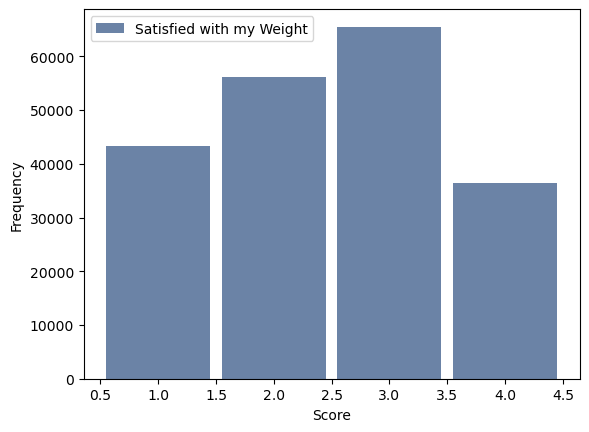

<Figure size 800x600 with 0 Axes>

In [6]:
# Histograms of Health
Summarize(data,"Health","Satisfied with my Weight:")
hist = thinkstats2.Hist(data.Health, label='Satisfied with my Weight')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

Annual Household Income:
key	n	mean	mode	var	std	cv
All Yrs	201216	100.85	87.00	8269.25	90.94	0.9017
2021	23964	104.60	87.00	7933.55	89.07	0.8515
2022	48668	104.41	87.00	8291.63	91.06	0.8722
2023	51409	98.64	87.00	8297.75	91.09	0.9235
2024	51480	98.98	87.00	8380.87	91.55	0.9249


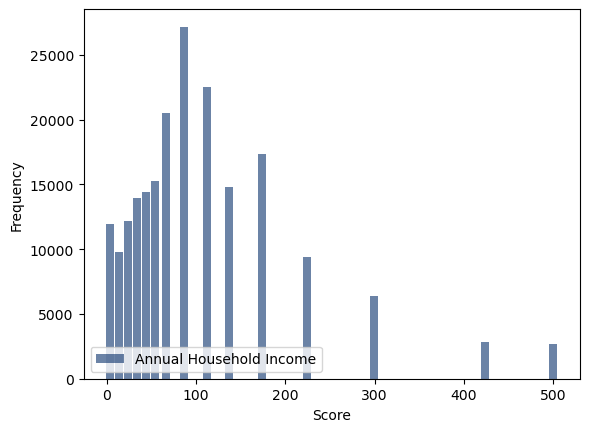

<Figure size 800x600 with 0 Axes>

In [71]:
# Histograms of HHI

Summarize(data,"HHI","Annual Household Income:")
hist = thinkstats2.Hist(data.HHI, label='Annual Household Income')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

My Friends are as Important as My Family:
key	n	mean	mode	var	std	cv
All Yrs	201216	2.51	3.00	0.92	0.96	0.3822
2021	23964	2.51	3.00	0.90	0.95	0.3785
2022	48668	2.50	3.00	0.91	0.95	0.3810
2023	51409	2.51	3.00	0.92	0.96	0.3821
2024	51480	2.52	3.00	0.94	0.97	0.3842


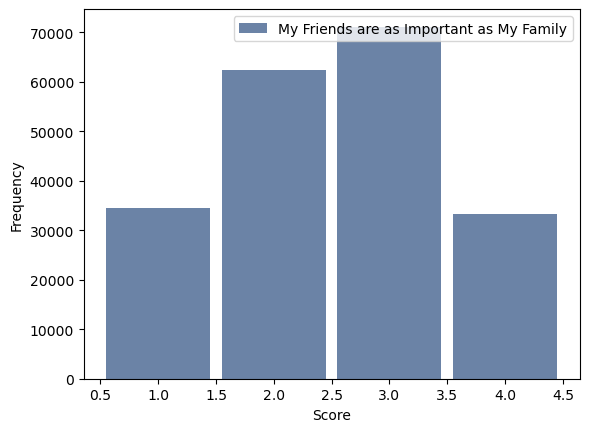

<Figure size 800x600 with 0 Axes>

In [10]:
# Histograms of Love

Summarize(data,"Love","My Friends are as Important as My Family:")
hist = thinkstats2.Hist(data.Love, label='My Friends are as Important as My Family')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

Faith: Hold to Religious Belief:
key	n	mean	mode	var	std	cv
All Yrs	201216	2.83	4.00	1.89	1.38	0.4865
2021	23964	2.80	4.00	1.92	1.39	0.4957
2022	48668	2.83	4.00	1.90	1.38	0.4874
2023	51409	2.82	4.00	1.89	1.38	0.4876
2024	51480	2.84	4.00	1.89	1.38	0.4850


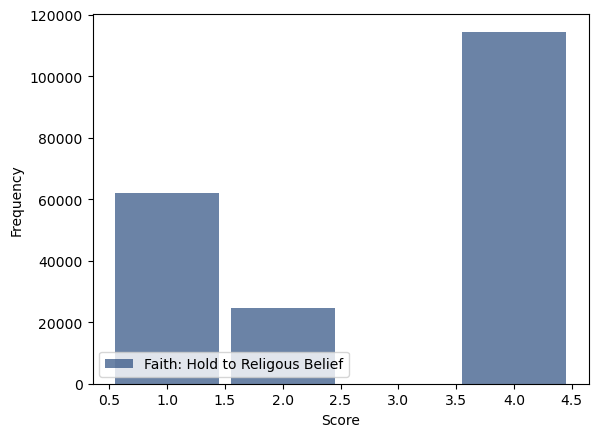

<Figure size 800x600 with 0 Axes>

In [101]:
# Histograms of Health

Summarize(data,"Faith","Faith: Hold to Religious Belief:")
hist = thinkstats2.Hist(data.Faith, label='Faith: Hold to Religous Belief')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

Happy with my Standard of Living:
key	n	mean	mode	var	std	cv
All Yrs	201216	3.07	3.00	0.64	0.80	0.2609
2021	23964	3.13	3.00	0.56	0.75	0.2392
2022	48668	3.12	3.00	0.60	0.77	0.2478
2023	51409	3.06	3.00	0.66	0.81	0.2660
2024	51480	3.03	3.00	0.67	0.82	0.2704


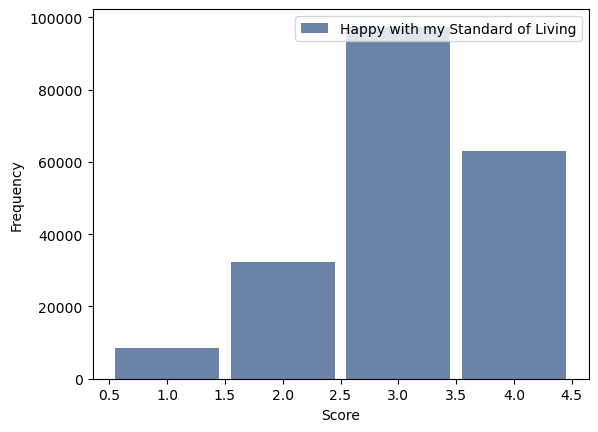

<Figure size 800x600 with 0 Axes>

In [104]:
# Histograms of Health

Summarize(data,"Happy","Happy with my Standard of Living:")
hist = thinkstats2.Hist(data.Happy, label='Happy with my Standard of Living')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

Health+Wealth+Love+Faith Score:
key	n	mean	mode	var	std	cv
All Yrs	201216	12.51	13.00	8.72	2.95	0.2361
2021	23964	12.73	13.00	8.35	2.89	0.2270
2022	48668	12.61	13.00	8.50	2.92	0.2311
2023	51409	12.41	13.00	8.82	2.97	0.2394
2024	51480	12.42	12.00	8.94	2.99	0.2407
{'label': 'Strength', 'd': {13: 25186, 12: 24810, 14: 23721, 11: 22874, 10: 19543, 15: 19419, 16: 14757, 9: 13576, 17: 10232, 8: 9380, 18: 5501, 7: 5475, 6: 2444, 19: 2361, 5: 1030, 20: 544, 4: 363}, 'log': False}


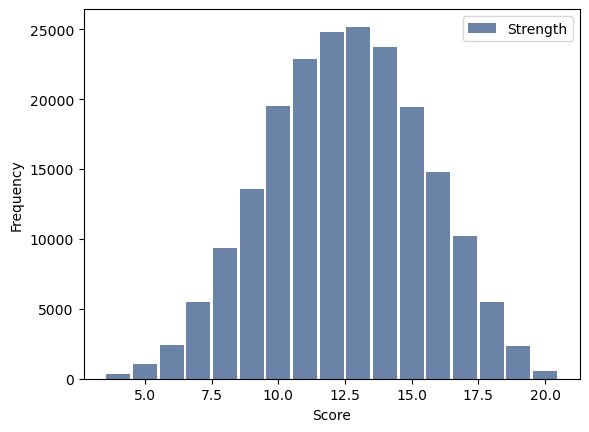

<Figure size 800x600 with 0 Axes>

In [35]:
data["strength"] = data.Health + data.Wealth + data.Love + data.Faith
Summarize(data,"strength","Health+Wealth+Love+Faith Score:")
hist = thinkstats2.Hist(data.strength, label='Strength')
print(vars(hist))
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Score', ylabel='Frequency')

### Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).

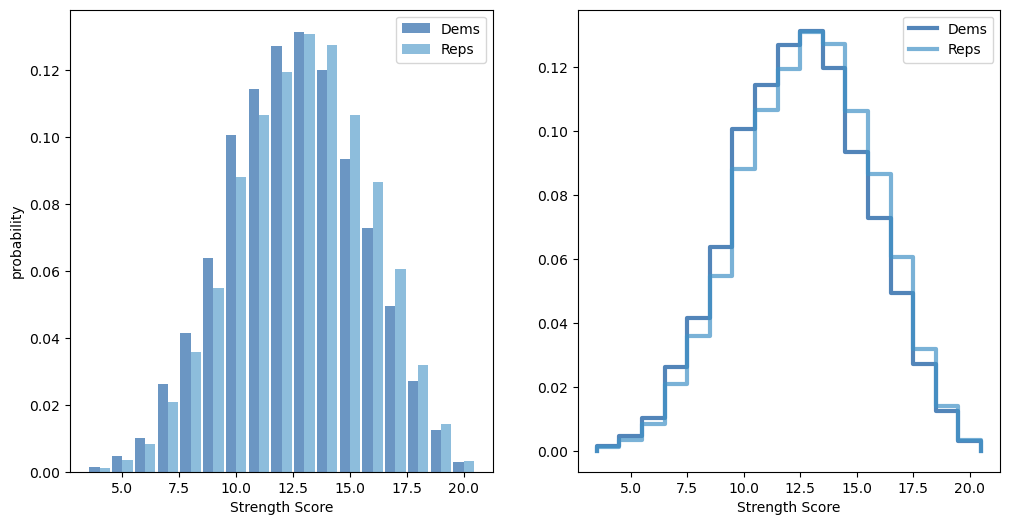

<Figure size 800x600 with 0 Axes>

In [131]:
first_pmf = thinkstats2.Pmf(data[data.Politics == 1].strength, label="Dems")
other_pmf = thinkstats2.Pmf(data[data.Politics == 2].strength, label="Reps")

width = 0.45
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='Strength Score',
ylabel='probability')
thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf]) 
thinkplot.Show(xlabel='Strength Score')

### Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).

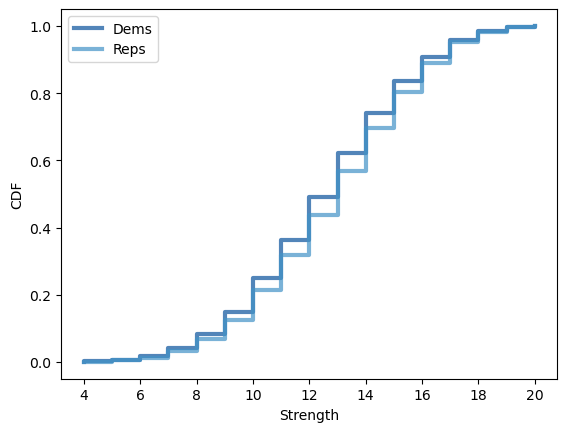

<Figure size 800x600 with 0 Axes>

In [119]:
first_cdf = thinkstats2.Cdf(data[data.Politics == 1].strength, label="Dems")
other_cdf = thinkstats2.Cdf(data[data.Politics == 2].strength, label="Reps")
thinkplot.PrePlot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot. Show(xlabel='Strength', ylabel='CDF')

### Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5). {-}

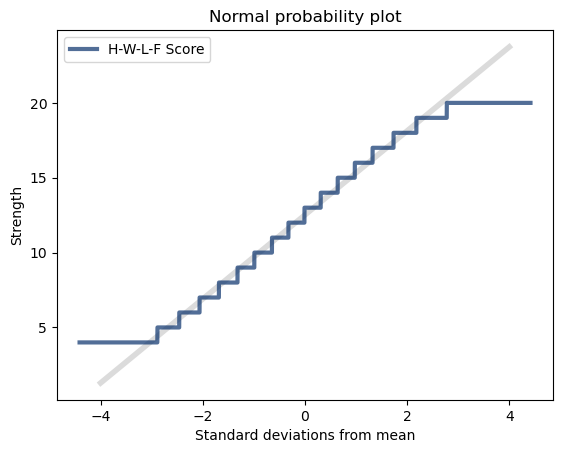

In [134]:
mean, var = thinkstats2.TrimmedMeanVar(data.strength, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color="0.8")

xs, ys = thinkstats2.NormalProbability(data.strength)
thinkplot.Plot(xs, ys, label="H-W-L-F Score")

thinkplot.Config(
    title="Normal probability plot",
    xlabel="Standard deviations from mean",
    ylabel="Strength",
)

### Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7). {-}

Correlation: 0.1995
Spearmans Corr: 0.1825


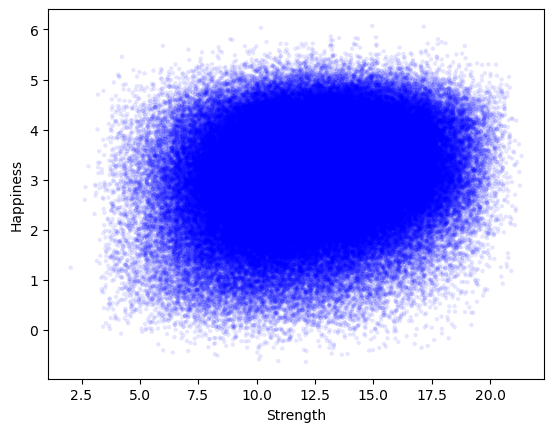

In [182]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values
    
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)
    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)
    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

print(f"Correlation: {Corr(data.strength,data.Happy):.4f}\nSpearmans Corr: {SpearmanCorr(data.strength,data.Happy):.4f}")
xs = [-4, 4]
jstrength, jhappy = Jitter(data.strength), Jitter(data.Happy)
bins = np.arange(0, 20, 1)
indices = np.digitize(jstrength, bins)
groups = data.groupby(indices)
mean_strengths = [jstrength.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(jhappy) for i, group in groups]
for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_strengths, weight_percentiles, label=label)

thinkplot.Scatter(jstrength, jhappy, alpha=0.1, s=10)
thinkplot.Config(xlabel='Strength',
                 ylabel='Happiness',
                 legend=False)

### Conduct a test on your hypothesis using one of the methods covered in Chapter 9. {-}

In [ ]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=1000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()



### For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11). {-}